In [96]:
import pandas as pd

# Load the JSON file into a DataFrame
df = pd.read_excel("file_path").set_index("Curr_Clinic")

# Load the Excel file of EchoGPT scores into a DataFrame
score = pd.read_excel("file_path")
score.index=df.index
score=score.fillna(0)

In [98]:
df[score.columns]=score

In [99]:
df["gender"]=df["gender"].replace({"b'Female'":"Female", "b'Male'":"Male"})

In [100]:
df=df.rename(columns={"F1RadGraph Score":"RadGraph F1 Score"})

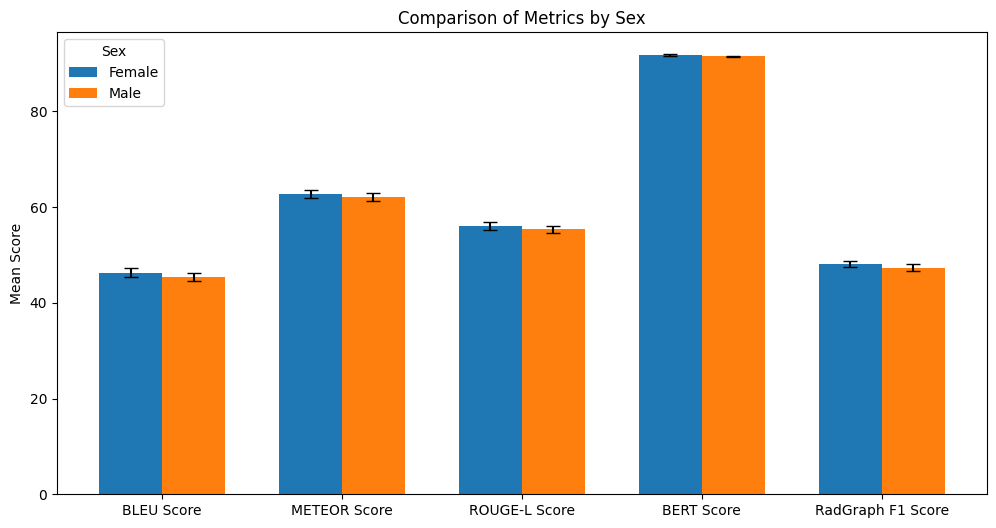

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming 'df' is your DataFrame containing the scores
# Select the metrics you want to compare
metrics = ['BLEU Score', 'METEOR Score', 'ROUGE-L Score', 'BERT Score', 'RadGraph F1 Score']

# Transpose the DataFrame for plotting
grouped_data = 100 * df.groupby('gender')[metrics].mean().transpose()

# Calculate Standard Error of the Mean (SEM) for each metric
grouped_sem = 100 * df.groupby('gender')[metrics].sem().transpose()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Number of bars for each group
n_groups = len(metrics)

# Width of each bar
bar_width = 0.35

# Create an array of bar positions
x = np.arange(n_groups)

# Plot mean scores with error bars (SEM) for each gender
for gender in grouped_data.columns:
    mean_values = grouped_data[gender]
    sem_values = grouped_sem[gender]
    
    ax.bar(x + (grouped_data.columns.get_loc(gender) * bar_width), mean_values, bar_width, label=gender, yerr=sem_values, capsize=5, error_kw={'capthick': 1})

ax.set_title('Comparison of Metrics by Sex')
# ax.set_xlabel('Metric')
ax.set_ylabel('Mean Score')
ax.legend(title='Sex', loc='upper left')
ax.set_xticks(x + (bar_width * (n_groups - 4) / 2))
ax.set_xticklabels(metrics, rotation=0)

plt.show()


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your DataFrame containing the scores
# Select the metrics you want to compare
metrics = ['BLEU Score', 'METEOR Score', 'ROUGE-L Score', 'BERT Score', 'RadGraph F1 Score']

# Create an empty list to store results
results = []

# Iterate over the metrics
for metric in metrics:
    # Separate data by gender
    male_data = df[df['gender'] == 'Male'][metric]
    female_data = df[df['gender'] == 'Female'][metric]

    # Check normality using the Shapiro-Wilk test
    _, male_p_value = stats.shapiro(male_data)
    _, female_p_value = stats.shapiro(female_data)

    # Perform the corresponding test based on normality
    if male_p_value > 0.05 and female_p_value > 0.05:
        # Both groups are normally distributed, use a t-test
        _, p_value = stats.ttest_ind(male_data, female_data)
        test_type = 't-test'
    else:
        # At least one group is not normally distributed, use Mann-Whitney U test
        _, p_value = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')
        test_type = 'Mann-Whitney U test'
    
    # Calculate mean and std for male and female groups
    male_mean = male_data.mean()
    male_std = male_data.std()
    female_mean = female_data.mean()
    female_std = female_data.std()

    # Store the results
    results.append({'Metric': metric, 
                    'p-value': p_value, 
                    'Test Type': test_type,
                    'Male Mean ± Std': f'{male_mean:.2f} ± {male_std:.2f}',
                    'Female Mean ± Std': f'{female_mean:.2f} ± {female_std:.2f}'})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

In [102]:
# Load the Excel file into a DataFrame
df2 = pd.read_excel("EchoGPT/Raw data/Combined-filtered-wDemo-1-25-24.xlsx").set_index("Curr_Clinic")

In [103]:
import pandas as pd

# Assuming you have loaded the DataFrame as 'df2'
# Define the original race mapping dictionary
race_mapping = {
    'White': 'White',
    'Native Hawaii/Pacific Islander': 'Other',
    'Choose Not to Disclose': 'Other',
    'Other': 'Other',
    'African American': 'Black',
    'Unknown': 'Other',
    'Black or African American': 'Black',
    'American Indian/Alaskan Native': 'Other',
    'Asian Filipino': 'Other',
    'Asian Japanese': 'Other',
    'Asian Korean': 'Other',
    'Asian Thai': 'Other',
    'Asian Chinese': 'Other',
    'Asian Indian': 'Other',
    'Asian Taiwanese': 'Other',
    'Native Hawaiian': 'Other',
    'Asian Other': 'Other',
    'Caribbean Black': 'Black',
    'Asian': 'Other',
    'Asian Cambodian': 'Other',
    'Asian Laotian': 'Other',
    'Asian Vietnamese': 'Other',
    'Unable to Provide': 'Other',
    'American Indian/Alaskan Native Southern Plains region native': 'Other',
    'African': 'Black',
    'American born African': 'Black',
    'No': 'Other',
    'Other Pacific Islander': 'Other',
    'Native Hawaiian/Pacific Islander': 'Other',
    'American Indian/Alaskan Native Pacific Coast region native': 'Other',
    'Asian Pakistani': 'Other',
    'American Born African': 'Black',
    'Black or African American Other': 'Black',
    'American Indian/Alaskan Native South West region native': 'Other',
    'Guamanian or Chamorro': 'Other',
    'American Indian/Alaskan Native Northern Plains region native': 'Other',
    'American Indian/Alaskan Native Eastern region native': 'Other',
    'American Indian/Alaskan Native Alaska region native': 'Other',
    'Samoan': 'Other'
}

# Replace values in the 'PATIENT_RACE_NAME' column using the mapping (end up with 3 groups: White, Black, and Other)
df2['PATIENT_RACE_NAME'] = df2['PATIENT_RACE_NAME'].map(race_mapping)

# Replace any remaining NaN values with 'Other'
df2['PATIENT_RACE_NAME'].fillna('Other', inplace=True)

In [104]:
df2 = df2[~df2.index.duplicated(keep='first')]

In [105]:
df["race"]=df2["PATIENT_RACE_NAME"]

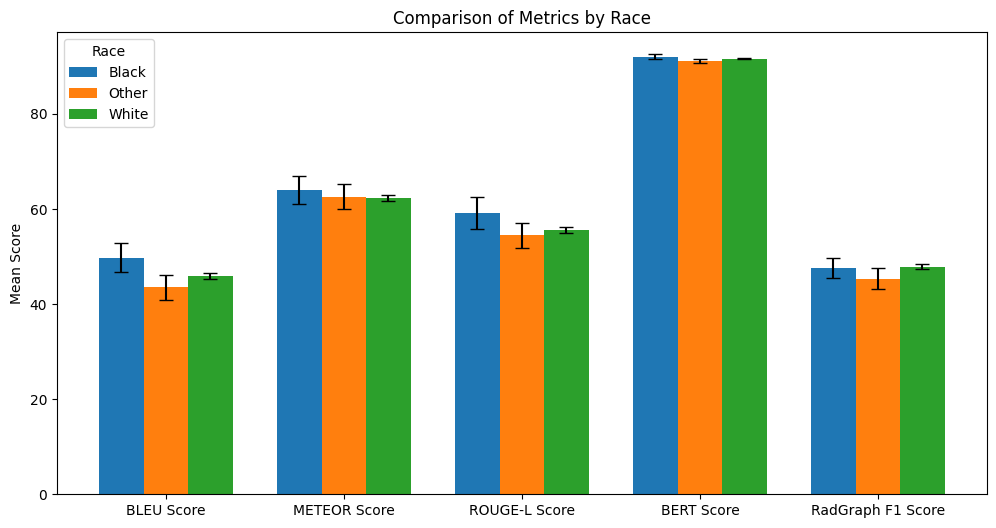

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming 'df' is your DataFrame containing the scores
# Select the metrics you want to compare
metrics = ['BLEU Score', 'METEOR Score', 'ROUGE-L Score', 'BERT Score', 'RadGraph F1 Score']

# Transpose the DataFrame for plotting
grouped_data = 100 * df.groupby('race')[metrics].mean().transpose()

# Calculate Standard Error (STE) for each metric
grouped_ste = 100 * df.groupby('race')[metrics].sem().transpose()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Number of bars for each group
n_groups = len(metrics)

# Width of each bar
bar_width = 0.25

# Create an array of bar positions
x = np.arange(n_groups)

# Plot mean scores with error bars (STE) for each race
for race in grouped_data.columns:
    mean_values = grouped_data[race]
    ste_values = grouped_ste[race]
    
    ax.bar(x + (grouped_data.columns.get_loc(race) * bar_width), mean_values, bar_width, label=race, yerr=ste_values, capsize=5, error_kw={'capthick': 1})

ax.set_title('Comparison of Metrics by Race')
# ax.set_xlabel('Metric')
ax.set_ylabel('Mean Score')
ax.legend(title='Race', loc='upper left')
ax.set_xticks(x + (bar_width * (n_groups - 3) / 2))
ax.set_xticklabels(metrics, rotation=0)

plt.show()


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your DataFrame containing the scores
# Select the metrics you want to compare
metrics = ['BLEU Score', 'METEOR Score', 'ROUGE-L Score', 'BERT Score', 'RadGraph F1 Score']

# Create an empty list to store results
results = []

# Iterate over the metrics
for metric in metrics:
    # Separate data by race groups
    white_data = 100*df[df['race'] == 'White'][metric]
    black_data = 100*df[df['race'] == 'Black'][metric]
    other_data = 100*df[df['race'] == 'Other'][metric]

    # Perform one-way ANOVA
    _, p_value = stats.f_oneway(white_data, black_data, other_data)
    
    # Calculate mean and std for each race group
    white_mean = white_data.mean()
    white_std = white_data.std()
    black_mean = black_data.mean()
    black_std = black_data.std()
    other_mean = other_data.mean()
    other_std = other_data.std()

    # Store the results with one decimal place
    results.append({'Metric': metric, 
                    'p-value': p_value, 
                    'Test Type': 'One-way ANOVA',
                    'White Mean ± Std': f'{white_mean:.1f} ± {white_std:.1f}',
                    'Black Mean ± Std': f'{black_mean:.1f} ± {black_std:.1f}',
                    'Other Mean ± Std': f'{other_mean:.1f} ± {other_std:.1f}'})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)